In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('user_behavior_dataset.csv')
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [4]:
df['Device Model'].value_counts()

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
df['Device Model']= LabelEncoder().fit_transform(df['Device Model'])
df['Gender']= LabelEncoder().fit_transform(df['Gender'])
df['Operating System']= LabelEncoder().fit_transform(df['Operating System'])

In [6]:
X=df.drop(['User Behavior Class','User ID'],axis=1)
y=df['User Behavior Class']

In [7]:
y=y-1

In [8]:
from sklearn.preprocessing import StandardScaler
X_scaled= StandardScaler().fit_transform(X)
X_scaled

array([[-1.42010632, -0.51335943,  0.6882558 , ...,  0.30040456,
         0.12638294,  0.96076892],
       [-0.72054656, -0.51335943, -0.01766827, ...,  0.02227699,
         0.70950576, -1.040833  ],
       [ 0.67857297, -0.51335943, -0.66147102, ..., -0.94960697,
         0.29298946,  0.96076892],
       ...,
       [-1.42010632, -0.51335943, -0.97207762, ..., -0.73866752,
         0.95941554, -1.040833  ],
       [-0.02098679, -0.51335943, -1.18103114, ..., -1.10273338,
         0.45959598,  0.96076892],
       [-0.72054656, -0.51335943, -0.33392226, ..., -0.15897468,
        -1.28977246, -1.040833  ]])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(560, 9)
(140, 9)
(560,)
(140,)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [11]:
model= Sequential()
model.add(Dense(units = 128, activation = 'relu', input_dim = X_train.shape[1] ))
model.add(Dense(64))
model.add(Dropout(0.3))
model.add(Dense(16))
model.add(Dense(y.nunique(), activation = 'softmax'))

C:\Users\shree\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [13]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])
#checkpoint=ModelCheckpoint('best_model_weights.h5',monitor='val_accuracy',save_best_only=True, mode='max') use early check point


In [14]:
history=model.fit(X_train, y_train, batch_size= 100, epochs= 100, validation_data= (X_test, y_test))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.2217 - loss: 1.6281 - val_accuracy: 0.4214 - val_loss: 1.3546
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4428 - loss: 1.2655 - val_accuracy: 0.4286 - val_loss: 1.1418
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4857 - loss: 1.0681 - val_accuracy: 0.5071 - val_loss: 1.0016
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5675 - loss: 0.9095 - val_accuracy: 0.6214 - val_loss: 0.8870
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6226 - loss: 0.8265 - val_accuracy: 0.7429 - val_loss: 0.7820
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6992 - loss: 0.7662 - val_accuracy: 0.7571 - val_loss: 0.6959
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7780 - loss: 0.6534 - val_accuracy: 0.8429 - val_loss: 0.6184
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7918 - loss: 0.6340 - val_accuracy: 0.9143 - val_loss

In [15]:
y_pred= model.predict(X_test)
y_pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[1.00233294e-15, 7.00869423e-04, 9.98794675e-01, 5.04427997e-04,
        4.03744150e-13],
       [1.60150891e-14, 2.44803913e-03, 9.97455418e-01, 9.66006482e-05,
        2.31109267e-13],
       [4.20849478e-18, 1.12251560e-04, 9.99732435e-01, 1.55260030e-04,
        6.97761093e-15],
       [2.20915378e-16, 5.29412313e-11, 1.77863240e-05, 9.99816716e-01,
        1.65569480e-04],
       [2.37264583e-17, 5.21503316e-05, 9.98975039e-01, 9.72881098e-04,
        2.51884180e-13],
       [2.88308917e-19, 1.33863881e-13, 4.94652397e-07, 9.99923229e-01,
        7.63238204e-05],
       [1.32646653e-26, 1.57732157e-35, 3.58319146e-28, 2.67982596e-08,
        1.00000000e+00],
       [6.38110865e-18, 2.11540519e-05, 9.99183357e-01, 7.95451109e-04,
        1.46797098e-13],
       [2.38872336e-26, 8.32488111e-33, 3.80447992e-25, 1.17461195e-06,
        9.99998808e-01],
       [1.18322239e-17, 2.18599398e-05, 9.98044133e-01, 1.93396281e-03,
        4.34811339e-13],
       [9.98473465e-01, 1.5265

In [16]:
y_pred=np.argmax(y_pred,-1)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_pred,y_test))

[[23  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 42  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 26]]


In [18]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        26

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



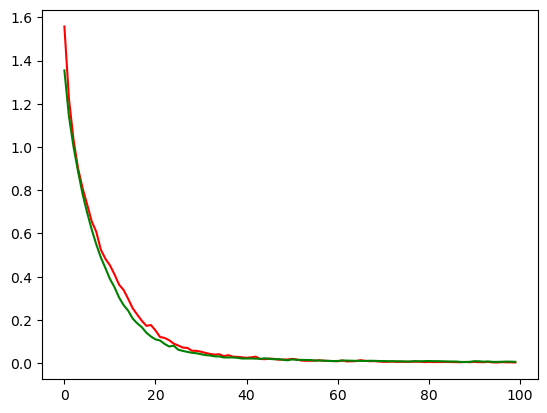

In [19]:
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='green')

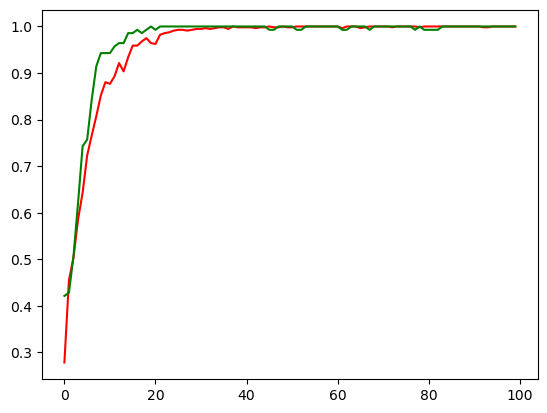

In [20]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='green')